In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
t_serial_N1200 = 0.019112
t_serial_N12k = 2.798848
t_serial = t_serial_N1200 
NB_path = "/home/cjkeerthana/Documents/Parallel_Programming/ParallelPrograaming/Exercise4/output/output_non_blocking"
Blocking_path = "/home/cjkeerthana/Documents/Parallel_Programming/ParallelPrograaming/Exercise4/output/output_blocking"
os.listdir(NB_path)
os.listdir(Blocking_path)

['N12k_1node',
 'N1200_4node',
 'N1200_3node',
 'extractTimes.sh',
 'N1200_2node',
 'N12k_2node',
 'N1200_1node',
 'N12k_3node',
 'N12k_4node']

In [3]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        time = 0
        for line in f.readlines():
                t = re.findall(r"[-+]?\d*\.\d+|\d+", line)
                time = time + float(t[1])
        return time

In [4]:
def read_all_times(dir_path):
    times = []
    for file in os.listdir(dir_path):
    # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = dir_path + "/" + file 
            name = file.split("_")
            avg_time = read_text_file(file_path)
            avg_time = avg_time/int(name[1])
            times.append((int(name[1]),avg_time))
    times.sort()
    procs = []
    tempo = []
    for e in times:
        a,b = e
        procs.append(a)
        tempo.append(b)
    return tempo

In [5]:
def separate_times(totTime, commTime, calcTime, ifBlocking):
    totTime = np.asarray(totTime)
    commTime = np.asarray(commTime)
    calcTime = np.asarray(calcTime)
    if(ifBlocking == "Blocking"):
        compTime = totTime - commTime
    else:
        commTime = commTime - calcTime
        calcTime = totTime - commTime
    return totTime,commTime,calcTime

In [6]:
def make_plots_times(title, labels, commTime, calcTime):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, commTime, width, label='CommTime')
    rects2 = ax.bar(x + width/2, calcTime, width, label='CalcTime')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time')
    ax.set_xlabel('procs')
    ax.set_title("Communication and Computation Times" + " " + title ) 
    ax.set_xticks(x)
    ax.legend()
    ax.set_xticklabels(labels)

    fig.tight_layout()

    plt.show()

In [7]:
def make_plot_speedup(totTime,procs,labels):
    speed_up = t_serial/totTime
    plt.plot(procs,speed_up)
    plt.title("Speed Up")
    plt.ylabel("speed up")
    plt.xlabel("procs")
    plt.xticks(procs)
    plt.show()

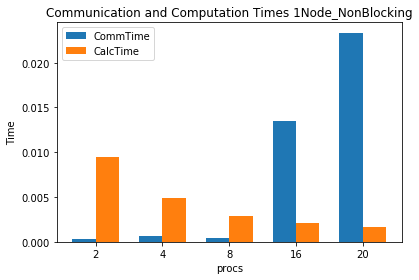

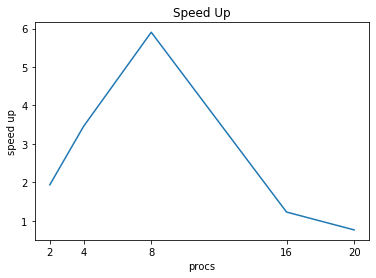

In [8]:
commTime = read_all_times(NB_path + "/N1200_1node/commTime")
totTime = read_all_times(NB_path + "/N1200_1node/totTime")
calcTime = read_all_times(NB_path + "/N1200_1node/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "NB")
labels = ["2","4","8","16","20"]
procs = np.asarray([2,4,8,16,20])
title = "1Node_NonBlocking"
make_plots_times(title,labels,commTime,calcTime)
make_plot_speedup(totTime,procs,labels)

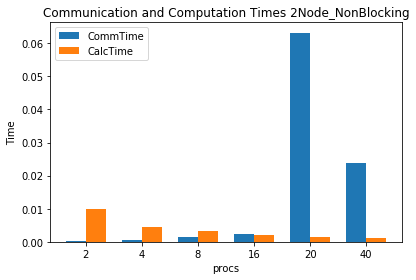

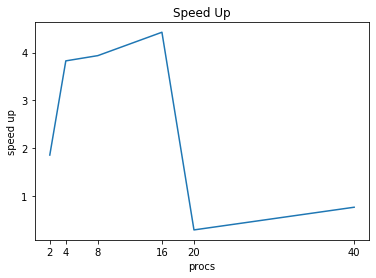

In [9]:
commTime = read_all_times(NB_path + "/N1200_2node/commTime")
totTime = read_all_times(NB_path + "/N1200_2node/totTime")
calcTime = read_all_times(NB_path + "/N1200_2node/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "NB")
labels = ["2","4","8","16","20","40"]
procs = np.asarray([2,4,8,16,20,40])
title = "2Node_NonBlocking"
make_plots_times(title,labels,commTime,calcTime)
make_plot_speedup(totTime,procs,labels)

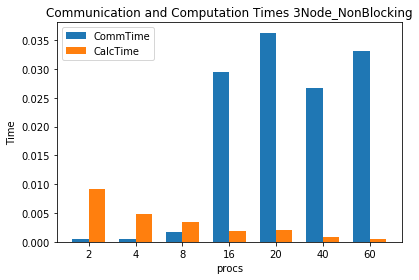

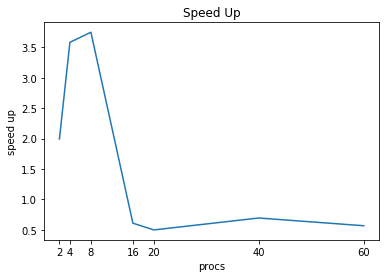

In [10]:
commTime = read_all_times(NB_path + "/N1200_3node/commTime")
totTime = read_all_times(NB_path + "/N1200_3node/totTime")
calcTime = read_all_times(NB_path + "/N1200_3node/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "NB")
labels = ["2","4","8","16","20","40","60"]
procs = np.asarray([2,4,8,16,20,40,60])
title = "3Node_NonBlocking"
make_plots_times(title,labels,commTime,calcTime)
make_plot_speedup(totTime,procs,labels)

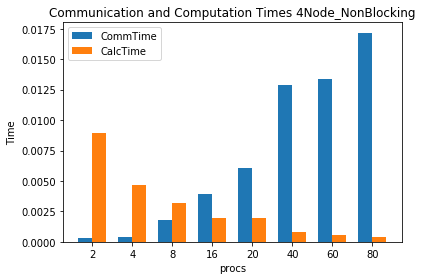

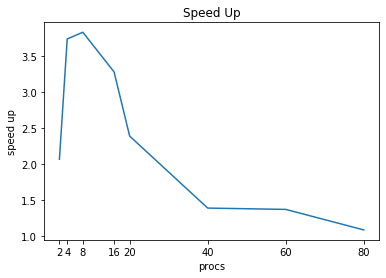

In [11]:
commTime = read_all_times(NB_path + "/N1200_4node/commTime")
totTime = read_all_times(NB_path + "/N1200_4node/totTime")
calcTime = read_all_times(NB_path + "/N1200_4node/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "NB")
labels = ["2","4","8","16","20","40","60", "80"]
procs = np.asarray([2,4,8,16,20,40,60,80])
title = "4Node_NonBlocking"
make_plots_times(title,labels,commTime,calcTime)
make_plot_speedup(totTime,procs,labels)

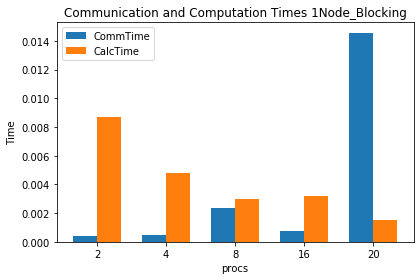

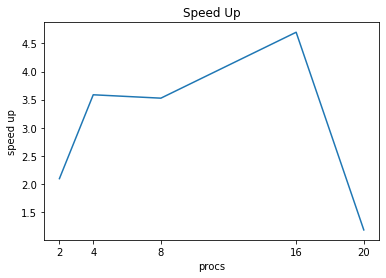

In [12]:
commTime = read_all_times(Blocking_path + "/N1200_1node/commTime")
totTime = read_all_times(Blocking_path + "/N1200_1node/totTime")
calcTime = read_all_times(Blocking_path + "/N1200_1node/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "Blocking")
labels = ["2","4","8","16","20"]
procs = np.asarray([2,4,8,16,20])
title = "1Node_Blocking"
make_plots_times(title,labels,commTime,calcTime)
make_plot_speedup(totTime,procs,labels)

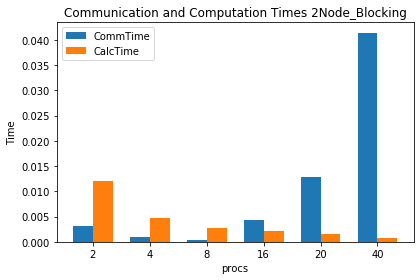

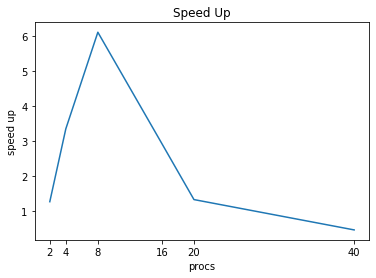

In [13]:
commTime = read_all_times(Blocking_path + "/N1200_2node/commTime")
totTime = read_all_times(Blocking_path + "/N1200_2node/totTime")
calcTime = read_all_times(Blocking_path + "/N1200_2node/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "Blocking")
labels = ["2","4","8","16","20", "40"]
procs = np.asarray([2,4,8,16,20,40])
title = "2Node_Blocking"
make_plots_times(title,labels,commTime,calcTime)
make_plot_speedup(totTime,procs,labels)

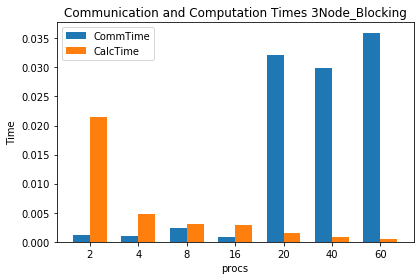

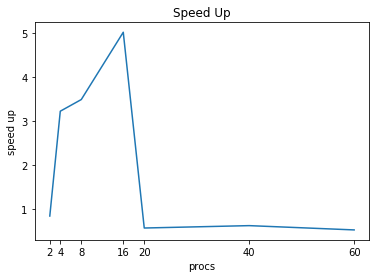

In [14]:
commTime = read_all_times(Blocking_path + "/N1200_3node/commTime")
totTime = read_all_times(Blocking_path + "/N1200_3node/totTime")
calcTime = read_all_times(Blocking_path + "/N1200_3node/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "Blocking")
labels = ["2","4","8","16","20", "40","60"]
procs = np.asarray([2,4,8,16,20,40,60])
title = "3Node_Blocking"
make_plots_times(title,labels,commTime,calcTime)
make_plot_speedup(totTime,procs,labels)

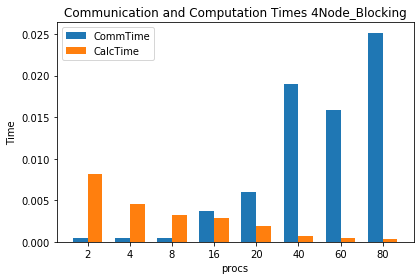

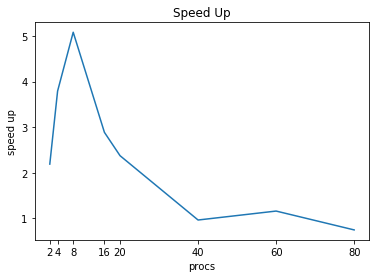

In [15]:
commTime = read_all_times(Blocking_path + "/N1200_4node/commTime")
totTime = read_all_times(Blocking_path + "/N1200_4node/totTime")
calcTime = read_all_times(Blocking_path + "/N1200_4node/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "Blocking")
labels = ["2","4","8","16","20","40","60", "80"]
procs = np.asarray([2,4,8,16,20,40,60,80])
title = "4Node_Blocking"
make_plots_times(title,labels,commTime,calcTime)
make_plot_speedup(totTime,procs,labels)

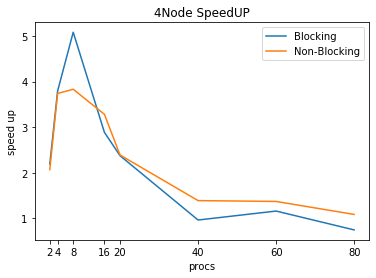

In [16]:
commTime = read_all_times(Blocking_path + "/N1200_4node/commTime")
totTime = read_all_times(Blocking_path + "/N1200_4node/totTime")
calcTime = read_all_times(Blocking_path + "/N1200_4node/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "Blocking")
commTime1 = read_all_times(NB_path + "/N1200_4node/commTime")
totTime1 = read_all_times(NB_path + "/N1200_4node/totTime")
calcTime1 = read_all_times(NB_path + "/N1200_4node/calcTime")
totTime1, commTime1, calcTime1 = separate_times(totTime1, commTime1, calcTime1, "NB")
labels = ["2","4","8","16","20","40","60", "80"]
procs = np.asarray([2,4,8,16,20,40,60,80])
title1 = "4Node SpeedUP"
plt.plot(procs,t_serial/totTime,label='Blocking')
plt.plot(procs,t_serial/totTime1,label='Non-Blocking')
plt.title(title1)
plt.ylabel("speed up")
plt.xlabel("procs")
plt.xticks(procs)
plt.legend()
plt.show()